# Lab1 - Transformers, ViT and VLM

The first two sections are an introduction to Git/GitHub and Pytorch. The last part focuses on Transformers, ViT and VLM. 

## I: Introduction to Git and GitHub

This notebook will guide you through the essential commands and operations needed to use Git and GitHub effectively. By the end of this notebook, you will be able to:

1. Install and configure Git.
2. Create a local repository.
3. Make commits to your repository.
4. Push your repository to GitHub.
5. Collaborate with others using GitHub.

### Step 1: Install and Configure Git

First, you need to install Git on your computer. You can download it from [git-scm.com](https://git-scm.com/).

Once installed, open your terminal (Command Prompt, PowerShell, or Git Bash) and configure Git with your username and email:

In [5]:
git config --global user.name "Your Name"
git config --global user.email "your.email@email.com"

SyntaxError: invalid syntax (2931567695.py, line 1)

### Step 2: Create a Local Repository

1. Create a new directory for your project and navigate into it:

In [ ]:
mkdir my_project
cd my_project

2. Initialize a new Git repository:

In [ ]:
git init

### Step 3: Make Commits to Your Repository

1. Create a new file (e.g., README.md) and add some content to it

In [ ]:
echo "# My Project" > README.md

2. Check the status of your repository:

In [ ]:
git status


3. Add the file to the staging area:

In [ ]:
git add README.md

4. Commit the changes:

In [ ]:
git commit -m "Initial commit"

### Step 4: Push Your Repository to GitHub

1. Create a new repository on GitHub. Do not initialize the repository with a README, .gitignore, or license.

2. Add the remote repository URL to your local repository:

In [ ]:
git remote add origin https://github.com/yourusername/my_project.git

3. Push your changes to the remote repository:

In [ ]:
git push -u origin master

### Step 5: Collaborate with Others Using GitHub

To collaborate with others, you can add collaborators to your GitHub repository. Go to the repository settings and add collaborators.

Collaborators can clone the repository to their local machine:

In [ ]:
git clone https://github.com/yourusername/my_project.git

Collaborators can create a new branch to work on a feature (A simple rule is: "one new feature, one branch, one pull request")


In [ ]:
git checkout -b feature-branch

They can make changes and commit them:

In [ ]:
git add .
git commit -m "Add new feature"

Push the branch to the remote repository:

In [ ]:
git push origin feature-branch

Create a pull request on GitHub to merge the branch into the main branch.

1. Click on "Contribute" and "Open pull request".

2. Select the Base (the branch you want to merge your changes into, typically the `main` or `master` branch.) and Compare (the branch that contains your changes) ranches:

3. Review the Changes: GitHub will show you the changes between the two branches. Review these changes to ensure everything looks correct.

4. Fill out the pull request form and create the pull request:

5. Review and Merge:

The pull request will now be visible to collaborators, who can review your changes, leave comments, and request modifications. If reviewers request changes, make the necessary modifications in your branch, commit them, and push the updates to the same branch. The pull request will automatically update with the new changes. Once the pull request is approved, you or a collaborator with merge permissions can merge the pull request into the base branch.



### Additional Git Commands

- Check the status of your repository:

In [ ]:
git status

- View the commit history:

In [ ]:
git log

- Switch to a different branch:

In [ ]:
git checkout branch-name

Merge a branch into the current branch:

In [ ]:
git merge branch-name

- Fetch updates from the remote repository:

In [ ]:
git fetch

- Pull updates from the remote repository and merge them into the current branch:

In [ ]:
git pull

## II: Introduction to PyTorch

PyTorch is an open-source machine learning library based on the Torch library, used for applications such as computer vision and natural language processing, primarily as a research platform that provides dynamic computation graphs and rich ecosystems of tools and libraries.

In this section, we will:
1. Introduce PyTorch and its basic concepts.
2. Learn how to manipulate tensors.
3. Define a simple Multi-Layer Perceptron (MLP).
4. Train the MLP on a simple dataset.

First, let's download and import PyTorch and check its version.

In [6]:
!pip install torch torchvision torchaudio numpy

Defaulting to user installation because normal site-packages is not writeable


In [7]:
import torch
print(f"PyTorch version: {torch.__version__}")

PyTorch version: 2.7.1+cu118


### 1. Tensors

Tensors are the core data structure in PyTorch. They are similar to NumPy arrays but with added functionality for GPU acceleration and automatic differentiation. Tensors are optimized for automatic differentiation (we will see more about that later in the Gradient section).

A. Creating Tensors

Tensor can be created 
- directly from data. The data type is automatically inferred. 
- from NumPy arrays
- from another tensor
- with random or constant values

In [8]:
# Creating a tensor from a list
x_from_list = torch.tensor([1, 2, 3, 4, 5])
print(f"Tensor from list: \n {x_from_list}")

# Creating a tensor from a numpy array
import numpy as np
numpy_array = np.array([1, 2, 3, 4, 5])
x_from_numpy = torch.tensor(numpy_array)


# Creating a tensor from another tensor
x_ones = torch.ones_like(x_from_list)
print(f"Ones Tensor: \n {x_from_list} \n")

x_rand = torch.rand_like(x_from_list, dtype=torch.float)
print(f"Random Tensor: \n {x_rand} \n")


# Creating a tensor with random values
x_random = torch.rand((3, 3))
print(f"Tensor with random values: \n {x_random} \n")


# Creating a tensor with constant values
x_zeros = torch.zeros((3, 3))
print(f"Tensor with zeros:\n {x_zeros} \n")

x_ones = torch.ones((3, 3))
print(f"Tensor with ones: \n {x_ones} \n")

Tensor from list: 
 tensor([1, 2, 3, 4, 5])
Ones Tensor: 
 tensor([1, 2, 3, 4, 5]) 

Random Tensor: 
 tensor([0.2824, 0.6258, 0.9962, 0.6457, 0.5824]) 

Tensor with random values: 
 tensor([[0.4488, 0.7791, 0.5488],
        [0.4749, 0.7091, 0.7459],
        [0.1148, 0.3517, 0.6834]]) 

Tensor with zeros:
 tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]) 

Tensor with ones: 
 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]) 



Tensor attributes describe their shape, datatype, and the device on which they are stored.

In [9]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


We notice that the variable `tensor` has 'cpu' as device attribute. PyTorch allows you to store tensors and perform computations on different devices, such as the CPU and GPU. Using a GPU can significantly speed up training and inference for large models and datasets.

By default, tensors are created on the CPU. We need to explicitly move tensors to the GPU using .to method. First, let's check if a GPU is available.

In [ ]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


If you’re using Colab, you can allocate a GPU by going to Runtime > Change runtime type > GPU. 
You can move tensors to a specific device using the .to(device) method.

In [ ]:
# Create a tensor (by default on the cpu)
tensor_cpu = torch.tensor([1.0, 2.0, 3.0])
print(f"Tensor on device: {tensor_cpu.device}")

# Move the tensor to the selected device
if torch.cuda.is_available():
    device = torch.device("cuda")
    tensor_device = tensor_cpu.to(device)
    print(f"Tensor on device: {tensor_device.device}")

Tensor on device: cpu
Tensor on device: cuda:0


### 2. Tensor operations

Lots of tensor operations, including arithmetic, linear algebra, matrix manipulation (transposing, indexing, slicing), sampling and more are already implemented in PyTorch. The next cells show some basic operations. You can find comprehensively list of available operations [here](https://pytorch.org/docs/stable/torch.html).

Arithmetic operation

In [ ]:
# Adding two tensors
tensor_a = torch.tensor([1, 2, 3])
tensor_b = torch.tensor([4, 5, 6])
tensor_sum = tensor_a + tensor_b
print(f"Sum of tensors: \n {tensor_sum}\n")


# Multiplying two tensors element-wise. All three result tensors will have the same value
tensor_product_1 = tensor_a * tensor_b
tensor_product_2 = tensor_a.mul(tensor_b)
tensor_product_3 = torch.mul(tensor_a, tensor_b)
print(f"Product of tensors: \n {tensor_product_1} \n")

y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)


# Matrix multiplication. All three result tensors will have the same value
tensor_c = torch.tensor([[1, 2], [3, 4]])
tensor_d = torch.tensor([[5, 6], [7, 8]])
tensor_matmul_1 = tensor_c.matmul(tensor_d)
tensor_matmul_2 = tensor_c @ tensor_d
tensor_matmul_3 = torch.matmul(tensor_c, tensor_d)
print(f"Matrix multiplication: \n {tensor_matmul_1} \n")

Sum of tensors: 
 tensor([5, 7, 9])

Product of tensors: 
 tensor([ 4, 10, 18]) 

Matrix multiplication: 
 tensor([[19, 22],
        [43, 50]]) 



Indexing and Slicing

In [ ]:
# Creating a 2D tensor
tensor_2d = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(f"2D Tensor: \n {tensor_2d} \n")

# Indexing
print(f"Element at (0, 0): \n {tensor_2d[0, 0]} \n")

# Slicing
print(f"First row: \n {tensor_2d[0, :]} \n")
print(f"First column: \n {tensor_2d[:, 0]} \n")

2D Tensor: 
 tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]) 

Element at (0, 0): 
 1 

First row: 
 tensor([1, 2, 3]) 

First column: 
 tensor([1, 4, 7]) 



Single tensor operations

In [ ]:
tensor = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0])

## Statistical operations: 
mean_value = tensor.mean()
print(f"Mean of tensor: \n {mean_value} - {type(mean_value)} \n")
mean_value_item = mean_value.item()
print(f"Mean of tensor (item): \n {mean_value_item} - {type(mean_value_item)}\n")

# Sum of all elements
sum_value = tensor.sum()
print(f"Sum of tensor: \n {sum_value} \n")

# Maximum value
max_value = tensor.max()
print(f"Maximum value in tensor: \n {max_value} \n")

# Minimum value
min_value = tensor.min()
print(f"Minimum value in tensor: \n {min_value} \n")

# Standard deviation
std_value = tensor.std()
print(f"Standard deviation of tensor: \n {std_value} \n")


Mean of tensor: 
 3.0 - <class 'torch.Tensor'> 

Mean of tensor (item): 
 3.0 - <class 'float'>

Sum of tensor: 
 15.0 

Maximum value in tensor: 
 5.0 

Minimum value in tensor: 
 1.0 

Standard deviation of tensor: 
 1.5811388492584229 



Concatenation and operation on the dimension 

In [ ]:
tensor = torch.ones(4, 4)
print(f"Initial tensor: \n {tensor} \n")

# Concatenation of tensors
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(f"Concatenated tensor (dim=1): \n {t1} \n")

t2 = torch.cat([tensor, tensor, tensor], dim=0)
print(f"Concatenated tensor (dim=0): \n {t2} \n")

# Squeeze and Unsqueeze operations
tensor_with_ones = torch.tensor([[1.0], [2.0], [3.0]])
print(f"Tensor with ones shape: \n {tensor_with_ones.shape} \n")
squeezed_tensor = tensor_with_ones.squeeze()
print(f"Squeezed tensor shape: \n {squeezed_tensor.shape} \n")

unsqueezed_tensor = tensor.unsqueeze(0)
print(f"Unsqueezed tensor shape at dimension 0 (shape): \n {unsqueezed_tensor.shape} \n")

# Add a dimension of size 1 at position 1
unsqueezed_tensor_1 = tensor.unsqueeze(1)
print(f"Unsqueezed tensor at dimension 1 (shape): \n {unsqueezed_tensor_1.shape} \n")

Initial tensor: 
 tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]) 

Concatenated tensor (dim=1): 
 tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]) 

Concatenated tensor (dim=0): 
 tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]) 

Tensor with ones shape: 
 torch.Size([3, 1]) 

Squeezed tensor shape: 
 torch.Size([3]) 

Unsqueezed tensor shape at dimension 0 (shape): 
 torch.Size([1, 4, 4]) 

Unsqueezed tensor at dimension 1 (shape): 
 torch.Size([4, 1, 4]) 



### 2. Neural networks

Neural networks comprise of layers/modules that perform operations on data. Neural networks in PyTorch subclasses the nn.Module. A neural network is a module itself that consists of other modules (layers). 

To create a neural network in PyTorch, follow these steps:
1. Define a class that inherits from `nn.Module`.
2. Implement the `__init__` method to initialize the layers of the network.
3. Implement the `forward` method to define the forward pass of the network.


The `__init__` function is used to initialize the layers of the neural network. In this example, we will define an MLP with one hidden layer.

The `forward` takes the input data x and passes it through the first fully connected layer (fc1). This layer applies a linear transformation to the input data. The first layer is then passed through the ReLU activation function. he output of the ReLU activation is finally passed through the second fully connected layer (fc2).  

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleMLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # First fully connected layer
        self.fc2 = nn.Linear(hidden_size, output_size)  # Second fully connected layer

    def forward(self, x):
        x = F.relu(self.fc1(x))  # Apply ReLU activation to the first layer
        x = self.fc2(x)  # Apply the second layer
        return x

Our MLP class is now defined. We can create an instance this class and move it to the `device`: 

In [ ]:
# Define the MLP
input_size = 784
hidden_size = 256
output_size = 10
model = SimpleMLP(input_size, hidden_size, output_size)
model.to(device)

# Print the model architecture
print(model)

SimpleMLP(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


To use the model, we pass it the input data. This executes the model’s forward, along with some background operations. Do not call `model.forward()` directly!

In [ ]:
X = torch.rand(1, 784, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred.item()}")

Predicted class: 8


Let’s break down the layers in the model.
We consider an input tensor `x` of shape `[1, 784]` (1 for the batch size, 784 for the size).

- nn.Linear

The linear layer is a module that applies a linear transformation on the input using its stored weights and biases.


In [ ]:
x = torch.rand(1, 784, device=device)

layer1 = nn.Linear(in_features=784, out_features=20, device=device)
hidden1 = layer1(x)
print(hidden1.size())

torch.Size([1, 20])


- nn.ReLU

Non-linear activations are what create the complex mappings between the model’s inputs and outputs. They are applied after linear transformations to introduce nonlinearity, helping neural networks learn a wide variety of phenomena.

In this model, we use nn.ReLU between our linear layers. 

In [ ]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-0.1773, -0.2566, -0.0387,  0.1032,  0.9115,  0.7156, -0.3300, -0.1091,
         -0.3234,  0.1020, -0.1095,  0.8357, -0.1295,  0.1232, -0.0343,  0.0808,
         -0.2553,  0.2188,  0.0898, -0.1184]], device='cuda:0',
       grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.0000, 0.0000, 0.1032, 0.9115, 0.7156, 0.0000, 0.0000, 0.0000,
         0.1020, 0.0000, 0.8357, 0.0000, 0.1232, 0.0000, 0.0808, 0.0000, 0.2188,
         0.0898, 0.0000]], device='cuda:0', grad_fn=<ReluBackward0>)


- nn.Sequential

nn.Sequential is an ordered container of modules. The data is passed through all the modules in the same order as defined. You can use sequential containers to put together a quick network like seq_modules.

In [ ]:
seq_modules = nn.Sequential(
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10, device=device)
)
logits = seq_modules(x)

- nn.Softmax

The last linear layer of the neural network returns logits - raw values in [-infty, infty] - which are passed to the nn.Softmax module. The logits are scaled to values [0, 1] representing the model’s predicted probabilities for each class. dim parameter indicates the dimension along which the values must sum to 1.

In [ ]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
print(f"Predicted probabilities: \n {pred_probab} \n")

Predicted probabilities: 
 tensor([[0.1136, 0.1254, 0.0884, 0.1181, 0.0896, 0.0737, 0.0898, 0.1132, 0.0771,
         0.1112]], device='cuda:0', grad_fn=<SoftmaxBackward0>) 



Many layers inside a neural network are parameterized, i.e. have associated weights and biases that are optimized during training. You can access to the parameters of a model using: `parameters()` or `named_parameters()` methods.

In [ ]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} \n")

Model structure: SimpleMLP(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


Layer: fc1.weight | Size: torch.Size([256, 784]) 

Layer: fc1.bias | Size: torch.Size([256]) 

Layer: fc2.weight | Size: torch.Size([10, 256]) 

Layer: fc2.bias | Size: torch.Size([10]) 



### 3. Differentiation and gradients in PyTorch

When training neural networks, the most frequently used algorithm is back propagation. In this algorithm, parameters (model weights) are adjusted according to the gradient of the loss function with respect to the given parameter.

To compute those gradients, PyTorch has a built-in differentiation engine called torch.autograd. It supports automatic computation of gradient for any computational graph.

To compute the derivative (of a variable, a loss, etc. with respect to a parameters), we use the `.backward()` method:  

In [ ]:
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

y = x ** 2
z = y.sum()

# Compute the gradient
z.backward()

print("Gradient of z with respect to x:", x.grad)

Gradient of z with respect to x: tensor([2., 4., 6.])


Consider the simplest one-layer neural network `z = w x + b`, with input x, parameters w and b, and some loss function.

In this network, w and b are parameters, which we need to optimize. Thus, we need to be able to compute the gradients of loss function with respect to those variables.

In [ ]:
x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

loss.backward()
print(f"Gradient of the loss with respect to w: \n {w.grad} \n")
print(f"Gradient of the loss with respect to b: \n {b.grad} \n")

Gradient of the loss with respect to w: 
 tensor([[0.2683, 0.2235, 0.2249],
        [0.2683, 0.2235, 0.2249],
        [0.2683, 0.2235, 0.2249],
        [0.2683, 0.2235, 0.2249],
        [0.2683, 0.2235, 0.2249]]) 

Gradient of the loss with respect to b: 
 tensor([0.2683, 0.2235, 0.2249]) 



A function that we apply to tensors to construct computational graph is in fact an object of class Function. This object knows how to compute the function in the forward direction, and also how to compute its derivative during the backward propagation step. A reference to the backward propagation function is stored in grad_fn property of a tensor.

In [ ]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x7fa2201c8dc0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7fa2201c87f0>


### 4. Training a neural network

Training a neural network in PyTorch involves several key steps: defining the model, preparing the data, specifying the loss function and optimizer, and iterating through the training loop. Let's go through each step in detail.

1. Define the model 

We will use the Multi-Layer Perceptron defined in the previous section.

2. Prepare the data

Next, we need to prepare our training and evaluation data. PyTorch provides `Dataset` and `DataLoader` classes to handle data loading and preprocessing efficiently. The `Dataset` class is an abstract class representing a dataset, and the `DataLoader` class provides an iterable over the given dataset. The `torchvision.datasets` module contains Dataset objects for many real-world vision data like CIFAR or COCO. 

In this example, we will use the [MNIST](https://yann.lecun.com/exdb/mnist/) dataset. 




PyTorch provides `Dataset` and `DataLoader` classes to handle data loading and preprocessing efficiently. The `Dataset` class is an abstract class representing a dataset, and the `DataLoader` class provides an iterable over the given dataset.

In this section, we will work with the MNIST Dataset. The `torchvision.datasets` module contains Dataset objects for many real-world vision data like CIFAR or COCO. 

In [ ]:
from torchvision import datasets
import torchvision.transforms as T

training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=T.Compose([T.ToTensor(), T.Lambda(lambda x: torch.flatten(x))]),
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=T.Compose([T.ToTensor(), T.Lambda(lambda x: torch.flatten(x))]),
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 15.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 370kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 2.03MB/s]


We then pass the Dataset as an argument to DataLoader. The DataLoader class supports batching, shuffling, and loading data in parallel using multiprocessing workers. Here we define a batch size of 64, i.e. each element in the dataloader iterable will return a batch of 64 features and labels.

In [ ]:
from torch.utils.data import DataLoader

batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 784])
Shape of y: torch.Size([64]) torch.int64


3. Specify the Loss Function and Optimizer

The loss function measures the difference between the predicted outputs and the true labels. The optimizer updates the model parameters to minimize the loss.

In [ ]:
import torch.optim as optim

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

4. Training Loop

The training loop involves iterating over the dataset, performing forward and backward passes, and updating the model parameters. The main steps are: 
- Zero the Parameter Gradients: `optimizer.zero_grad()` clears the old gradients from the last step. This is important because PyTorch accumulates gradients by default.
- Forward Pass: The input data is passed through the model to get the outputs. The loss is then computed using the criterion.
- Backward Pass: `loss.backward()` computes the gradient of the loss with respect to the model parameters. 
- Optimization: `optimizer.step()` updates the model parameters using the computed gradients.

In [ ]:
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_dataloader)}], Loss: {running_loss/100:.4f}')
            running_loss = 0.0

print("Training complete.")


Epoch [1/10], Step [100/938], Loss: 1.3691
Epoch [1/10], Step [200/938], Loss: 0.5251
Epoch [1/10], Step [300/938], Loss: 0.4379
Epoch [1/10], Step [400/938], Loss: 0.3567
Epoch [1/10], Step [500/938], Loss: 0.3650
Epoch [1/10], Step [600/938], Loss: 0.3255
Epoch [1/10], Step [700/938], Loss: 0.3210
Epoch [1/10], Step [800/938], Loss: 0.3181
Epoch [1/10], Step [900/938], Loss: 0.2627
Epoch [2/10], Step [100/938], Loss: 0.2338
Epoch [2/10], Step [200/938], Loss: 0.2686
Epoch [2/10], Step [300/938], Loss: 0.2459
Epoch [2/10], Step [400/938], Loss: 0.2224
Epoch [2/10], Step [500/938], Loss: 0.2367
Epoch [2/10], Step [600/938], Loss: 0.2130
Epoch [2/10], Step [700/938], Loss: 0.2176
Epoch [2/10], Step [800/938], Loss: 0.2245
Epoch [2/10], Step [900/938], Loss: 0.1812
Epoch [3/10], Step [100/938], Loss: 0.1627
Epoch [3/10], Step [200/938], Loss: 0.1959
Epoch [3/10], Step [300/938], Loss: 0.1740
Epoch [3/10], Step [400/938], Loss: 0.1622
Epoch [3/10], Step [500/938], Loss: 0.1765
Epoch [3/10

5. Evaluation

After training, you can evaluate the model on the test dataset to see how well it performs. We need to:
- Set the Model to Evaluation Mode: `model.eval()` sets the model to evaluation model
- Disable Gradient Calculation: `torch.no_grad()` disables gradient calculation. It also reduce memory consumption and speeds up computation.
- Compute Accuracy: The model's predictions are compared to the true labels to compute the accuracy.


In [ ]:
# Evaluation loop
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():  # Disable gradient calculation
    for data in test_dataloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%')


Accuracy of the network on the 10000 test images: 97.78%


## III: Attention and Transformers

In this part, we will implement the Transformers architecture. Transformers has been a key architecture in deep learning for the past 5 years. 

It has first began with NLP, then came audio and finally, since 2020, computer vision.
We will implement every block that makes a transformer from scratch and we will try to create a deep understanding of what is happening.
Here is a figure for the transformer architecture:


<img src="https://www.researchgate.net/profile/Miruna-Gheata/publication/355339249/figure/fig1/AS:1079476452622337@1634378650979/Encoder-decoder-architecture-of-the-Transformer-developed-by-Vaswani-et-al-28.ppm" width=768>

In [10]:
!pip install einops
!pip install timm

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import AdamW
import math
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torchvision import transforms
from tqdm import tqdm
# Fix matplotlib version issue
import matplotlib
matplotlib.__version_info__ = tuple(map(int, matplotlib.__version__.split('.')[:2]))
matplotlib.use('Agg')  # Non-interactive backend
import numpy as np
from einops import rearrange, repeat
from PIL import Image
from torchvision import transforms
import requests

torch.manual_seed(3407)


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### III-1. The attention mechanism

### Implementing the scaled dot-product attention mechanism

The transformer architecture is built around one key block: The attention.
The idea behind attention is the following. Imagine you want to retrieve information from a dictionary. The dictionnary is indexed by keys which maps to a particular value. Now, you have a query which will be matched against the keys of the dict and if you have a match, you will retrieve the associated value.
Attention is very similar to this simple retrieval example. Now, with real data, we don't have this structure, we however are going to learn to create it. 

We have 2 sets of vectors (also named tokens). One is $X_{to}$ which is the destination set. We want to be able to map this set of tokens to queries. We achieve this by doing a linear projection of $X_{to}$ to obatain:  $Q = W_QX_{to}$

The other set is $X_{from}$ the set from which we want to retrieve information. We will need to extract both keys and values from this set. We therefore do 2 linear projections of $X_{from}$ to obtain:  $K = W_KX_{from}$ and $V = W_VX_{from}$.

Now, contrary to the dictionnary where queries and values are exact matchs, we don't have this here. Therefore, we will perform a softer match by computing the similarity matrix between $Q$ and $K$. Then for each $Q$, we want to output the values that have the higher similarity. We therefore output the weighted sum of the values, weighted by the softmax of the similarity (also called the attention matrix).

Finally, the attention operation is given by the cross attention:

$$
A(Q,K,V) = \text{SoftMax}(\frac{QK^T}{\sqrt{d_k}})V
$$

We divide the similarity by $\sqrt{d_k}$ for stability reason to avoid the similarity to explode with big vectors which would lead to very sharp attention coeficients.

#### Question 1.
Implement the attention operation, use  `torch.einsum` to easily compute the similarity matrix.

In [12]:
class Attention(nn.Module):
    def __init__(self, x_to_dim, x_from_dim, hidden_dim,):  
        # To complete
        super(Attention, self).__init__()
        self.scale = 1.0 / math.sqrt(hidden_dim)
        self.to_q = nn.Linear(x_to_dim, hidden_dim, bias=False)
        self.to_k = nn.Linear(x_from_dim, hidden_dim, bias=False)
        self.to_v = nn.Linear(x_from_dim, hidden_dim, bias=False)
        self.to_out = nn.Linear(hidden_dim, x_to_dim)
        
    def forward(self, x_to, x_from):
        # x_to = [batch size, x_to_len, x_to_dim]
        # x_from = [batch size, x_from_len, x_from_dim]

        # To complete
        Q = self.to_q(x_to)  # (batch size, x_to_len, hidden_dim)
        K = self.to_k(x_from)  # (batch size, x_from_len, hidden_dim)
        V = self.to_v(x_from)  # (batch size, x_from_len, hidden_dim)
        
        similarity = torch.einsum('bqd,bkd->bqk', Q, K)
        similarity = similarity * self.scale
        attention_weights = F.softmax(similarity, dim=-1)  # [batch_size, x_to_len, x_from_len]
        out = torch.einsum('bqk,bkd->bqd', attention_weights, V)  # [batch_size, x_to_len, hidden_dim]
        out = self.to_out(out)  # [batch_size, x_to_len, x_to_dim]
        
        return out

### Multi-head attention

We improve the above attention implementation by introducing multi-head attention. The idea here is that we compute the attention on subspaces of the $Q,K,V$ triplets. 
We split each vector in $n$ subsets and compute the attention for each subset. At the end, we concatenate every attention output and project it with an output projection.

#### Question 2. 
Implement Multihead attention.

In [13]:
class MultiHeadAttention(nn.Module):
    def __init__(self, x_to_dim, x_from_dim, hidden_dim, n_heads):
        # To complete
        super(MultiHeadAttention, self).__init__()
        self.n_heads = n_heads
        assert hidden_dim % n_heads == 0, "hidden_dim must be divisible by n_heads"
        self.head_dim = hidden_dim // n_heads
        self.scale = 1.0 / math.sqrt(self.head_dim)

        self.to_q = nn.Linear(x_to_dim, hidden_dim, bias=False)
        self.to_k = nn.Linear(x_from_dim, hidden_dim, bias=False)
        self.to_v = nn.Linear(x_from_dim, hidden_dim, bias=False)
        self.to_out = nn.Linear(hidden_dim, x_to_dim)

    def forward(self, x_to, x_from):
        # x_to = [batch size, x_to_len, x_to_dim]
        # x_from = [batch size, x_from_len, x_from_dim]

        # To complete
        batch_size = x_to.size(0)
        Q = self.to_q(x_to)  # (batch size, x_to_len, hidden_dim)
        K = self.to_k(x_from)  # (batch size, x_from_len, hidden_dim)
        V = self.to_v(x_from)  # (batch size, x_from_len, hidden_dim)
        Q = Q.view(batch_size, -1, self.n_heads, self.head_dim).transpose(1, 2)  # (batch size, n_heads, x_to_len, head_dim)
        K = K.view(batch_size, -1, self.n_heads, self.head_dim).transpose(1, 2)  # (batch size, n_heads, x_from_len, head_dim)
        V = V.view(batch_size, -1, self.n_heads, self.head_dim).transpose(1, 2)  # (batch size, n_heads, x_from_len, head_dim)
        similarity = torch.einsum('bhqd,bhkd->bhqk', Q, K)
        similarity = similarity * self.scale
        attention_weights = F.softmax(similarity, dim=-1)  # [batch_size, n_heads, x_to_len, x_from_len]
        out = torch.einsum('bhqk,bhkd->bhqd', attention_weights, V)  # [batch_size, n_heads, x_to_len, head_dim]
        out = out.transpose(1, 2).contiguous().view(batch_size, -1, self.n_heads * self.head_dim)  # [batch_size, x_to_len, hidden_dim]
        out = self.to_out(out)  # [batch_size, x_to_len, x_to_dim]  
        return out

MultiheadAttention is the attention that is used in transformers in pratice. It is used in 2 flavors:
- Self Attention: When $X_{to}$ attends itself ($X_{to}=X_{from}$)
- Cross Attention. $X_{to}\neq X_{from}$


#### Question 3. 
Implement MultiHead Self Attention and MultiHeadCrossAttention

In [14]:
class MultiHeadSelfAttention(MultiHeadAttention):
    def __init__(self, x_dim, hidden_dim, n_heads):
        # To complete
        super(MultiHeadSelfAttention, self).__init__(x_dim, x_dim, hidden_dim, n_heads)

    def forward(self, x):
        # x = [batch size, x_len, x_dim]
        # To complete
        return super(MultiHeadSelfAttention, self).forward(x, x)
    
class MultiHeadCrossAttention(MultiHeadAttention):
    def __init__(self, x_to_dim, x_from_dim, hidden_dim, n_heads):
        # To complete
        super(MultiHeadCrossAttention, self).__init__(x_to_dim, x_from_dim, hidden_dim, n_heads)

    
    def forward(self, x_to, x_from):
        # x_to = [batch size, x_to_len, x_to_dim]
        # x_from = [batch size, x_from_len, x_from_dim]
        
        # To complete
        return super(MultiHeadCrossAttention, self).forward(x_to, x_from)

### LayerNorm
Another key component of the transformer is the LayerNorm. As we have previously seen, normalizing the output of a deep learning layer helps a lot with convergence and stability. 
Until Transformers, the most used normalization is BatchNorm. We normalize the data among the batch dimension. However, this has a few problems.
- The normalization depend on the other samples in the batch
- When using multiple GPUs, BatchNorm needs to synchronize the batch statistic across GPUs, which locks the forward process and slow down training.

The last element is the most important one. Transformers, aims to be a easy to parralilize architecture and can't afford to use batchnorm.

Instead, Transformers uses Layer Norm. LayerNorm is sample dependent, which removes the synchronization issue. We normalize over the channel dimension instead of the batch dimension.

<img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*gat8a-TUnopoYN_veGEi0w.png">

To account for the loss of capacity, we map the output by a linear transformation with a learned bias and scale.

#### Question 4.
Implement the LayerNorm

In [15]:
class LayerNorm(nn.Module):
    # To complete
    def __init__(self, dim, eps=1e-6):
        super(LayerNorm, self).__init__()
        self.eps = eps
        self.gamma = nn.Parameter(torch.ones(dim))
        self.beta = nn.Parameter(torch.zeros(dim))

    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        variance = x.var(dim=-1, keepdim=True, unbiased=False)
        x_normalized = (x - mean) / torch.sqrt(variance + self.eps)
        return self.gamma * x_normalized + self.beta

### Feed Feedward Network

Finally, the last block is a feed-forward network with one hidden layer. This layer has usually a size of $2 * input\_dim$. This is followed by a dropout layer and an activation function. Here, we will use leaky relu, with a leak parameter of 0.1.

#### Question 5.
Implement the FFN layer

In [16]:
class FFN(nn.Sequential):
    def __init__(self, hidden_dim, dropout_rate=0.1, expansion_factor=2):
        # To complete
        super(FFN, self).__init__(
            nn.Linear(hidden_dim, hidden_dim * expansion_factor),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_dim * expansion_factor, hidden_dim),
            nn.Dropout(dropout_rate)
        )


In [17]:
# Personal note: we could also define the class with the following code:

# class FFN(nn.Module):
#     def __init__(self, hidden_dim, dropout_rate=0.1, expansion_factor=2):
#         super().__init__()
#         self.linear1 = nn.Linear(hidden_dim, hidden_dim * expansion_factor)
#         self.activation = nn.LeakyReLU(negative_slope=0.1)
#         self.dropout1 = nn.Dropout(dropout_rate)
#         self.linear2 = nn.Linear(hidden_dim * expansion_factor, hidden_dim)
#         self.dropout2 = nn.Dropout(dropout_rate)

#     def forward(self, x):
#         x = self.linear1(x)
#         x = self.activation(x)
#         x = self.dropout1(x)
#         x = self.linear2(x)
#         x = self.dropout2(x)
#         return x


### The Transformer block

The last thing that we are missing are the skip connection. Like in ResNet, the transformer architecture implements the skip-connection. This allow for a better gradient flow avoiding vanishing gradient.
There is a skip connection after the attention and the feed forward network

#### Question 6.
Given at the transformer figure at the top, implement the Transformer Encoder Block

In [18]:
class TransformerEncoderBlock(nn.Module):
    def __init__(self ,data_dim, hidden_dim, n_heads, dropout_rate=0.1):
        # To complete
        super(TransformerEncoderBlock, self).__init__()
        self.mhsa = MultiHeadSelfAttention(data_dim, hidden_dim, n_heads)
        self.norm1 = LayerNorm(data_dim)
        self.ffn = FFN(hidden_dim, dropout_rate)
        self.norm2 = LayerNorm(data_dim)

    def forward(self, x):
        # x = [batch size, x_len, hidden dim]
        # To complete
        x_residual = x
        x = self.mhsa(x)
        x = x + x_residual
        x = self.norm1(x)
        x_residual = x
        x = self.ffn(x)
        x = x + x_residual
        x = self.norm2(x)
        return x

### Positional embedding
The transformers architecture is permutation independent. That means that for every token, we can swap 2 tokens and have the exact same result. However, the position of the token can be a very important information to consider. Imagine in an image. If a pixel is nearby another pixel, we want the transformer to be able to capture such information. Which is not the case for now.
That's why we introduce positional encodings. For each token, add the positional encoding to the original token:

$$
X_i = X_i + PE(i)
$$

with X_i the token at the i dimension.

The most used positional encodings are sinusoidal encodings. They are defined as follow:

$$
PE(i, 2j) = sin(i / 10000^{\frac{2j}{d}}) \\
PE(i, 2j + 1) = cos(i / 10000^{\frac{2j}{d}})
$$


Where $d$ the dimension of the tokens, $i$, the i-th token in the sequence and $2j$ (resp $2j + 1$), the index of the dimension of the vector.
The idea here is that we add a sinusoidal that encode the position in a multidimensional array.

Another common positional encodings is the learned positional encoding. Simply, we let the network learn a set of tensor $PE$ that match the sequence length and dimension of the tokens.

#### Question 7. 

Implement both Sinusoidal and Learned positional embeddings

In [19]:
class SinusoidalPositionalEncoding(nn.Module):
    def __init__(self, hidden_dim):
        # To complete
        super(SinusoidalPositionalEncoding, self).__init__()
        self.hidden_dim = hidden_dim


    def forward(self, x):
        # x = [batch size, seq len, hidden dim]
        # To complete
        batch_size, seq_len, _ = x.size()
        position = torch.arange(0, seq_len, device=x.device).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, self.hidden_dim, 2, device=x.device) * -(math.log(10000.0) / self.hidden_dim))
        pe = torch.zeros(seq_len, self.hidden_dim, device=x.device)
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).expand(batch_size, -1, -1)
        x = x + pe
        return x

class LearnedPositionalEncoding(nn.Module):
    def __init__(self, hidden_dim, max_len):
        # To complete
        super(LearnedPositionalEncoding, self).__init__()
        self.pos_embedding = nn.Embedding(max_len, hidden_dim)
    
    def forward(self, x):
        # x = [batch size, seq len, hidden dim]
        # To complete
        batch_size, seq_len, _ = x.size()
        positions = torch.arange(0, seq_len, device=x.device).unsqueeze(0).expand(batch_size, -1)
        pos_embeddings = self.pos_embedding(positions)
        x = x + pos_embeddings
        return x

### The transformer encoder
Now you have everything you need to implement the transformer . You add positional encoding to the tokens and then stack N transformer encoder layers

#### Question 8. 
Implement the transformer encoder with n_layers and the ability to choose both positional embeddings.

Tip: Look into `ModuleList`

In [20]:
class TransformerEncoder(nn.Module):
    def __init__(self, data_dim,  hidden_dim, n_heads, n_layers, dropout_rate=0.1, positional_encoding="sinusoidal", max_len=1000):
        # To complete
        super(TransformerEncoder, self).__init__()
        if positional_encoding == "sinusoidal":
            self.pos_encoding = SinusoidalPositionalEncoding(hidden_dim)
        elif positional_encoding == "learned":
            self.pos_encoding = LearnedPositionalEncoding(hidden_dim, max_len)
        else:
            raise ValueError("Unknown positional_encoding type")
        self.layers = nn.ModuleList([
            TransformerEncoderBlock(data_dim, hidden_dim, n_heads, dropout_rate) for _ in range(n_layers)
        ])
        
    
    def forward(self, x):
        # x = [batch size, seq len, hidden dim]
        # To complete
        x = self.pos_encoding(x)
        for layer in self.layers:
            x = layer(x)
        return x

# IV: Vision Transformers (ViT)

The above architecture was introduced in 2017 to process sequences of text tokens. However, it could be useful to be able to leverage this architecture for computer vision.

This could be interesting to leverage to improve vision systems. If we learn the biases from the data, we can hope to have better performances. We however need compute and a lot of data to do this.

To apply the transformer to images, one key question remains to be answered: How do we transform an image to tokens? The approach introduce in Vision Transformers is to cut the image into patches that are then transformed into a token trhought a linear projection.

We also add an extra token, known as the classification token, that will be the token which will be use to predict upon. After going through the N transformer layers, this is the token that goes throught a multi layer perceptron.


<img src= "https://1.bp.blogspot.com/-_mnVfmzvJWc/X8gMzhZ7SkI/AAAAAAAAG24/8gW2AHEoqUQrBwOqjhYB37A7OOjNyKuNgCLcBGAsYHQ/s1600/image1.gif" width="512">


#### Question 9

Implement the PatchEmbedding class that allows to transform an image into a sequence of patches. 

Hint: Use a Conv2D with the right kernel size and stride to do the linear projection of non-overlapping patches

In [21]:
class PatchEmbeddings(nn.Module):
    def __init__(self, img_size=96, patch_size=16, hidden_dim=512):
        super().__init__()
        # To complete
        self.img_size = img_size
        self.patch_size = patch_size
        self.hidden_dim = hidden_dim
        self.n_patches = (img_size // patch_size) ** 2
        self.proj = nn.Conv2d(in_channels=3, out_channels=hidden_dim, kernel_size=patch_size, stride=patch_size)

    def forward(self, x):
        # To complete
        batch_size = x.size(0)
        x = self.proj(x) 
        x = x.flatten(2) 
        x = x.transpose(1, 2)
        return x

#### Question 10

Implement the vision transformer

Hint: Use Conv2D with the right kernel size and stride to do the linear projection of non-overlapping patches.

In [22]:
class ViT(nn.Module):
    def __init__(self, img_size, patch_size, hidden_dim, n_heads, n_layers, n_classes, dropout_rate):
        super(ViT, self).__init__()

        self.patch_embeddings = PatchEmbeddings(img_size, patch_size, hidden_dim)

        self.cls_token = nn.Parameter(torch.zeros(1, 1, hidden_dim))

        self.transformer_encoder = TransformerEncoder(
            data_dim=hidden_dim,
            hidden_dim=hidden_dim,
            n_heads=n_heads,
            n_layers=n_layers,
            dropout_rate=dropout_rate,
            positional_encoding="learned",
            max_len=(img_size // patch_size) ** 2 + 1
        )

        self.mlp_head = nn.Sequential(
            nn.LayerNorm(hidden_dim),
            nn.Linear(hidden_dim, n_classes)
        )

    def forward(self, x, apply_mlp_head=True):
        x = self.patch_embeddings(x)

        B = x.size(0)
        cls_tokens = self.cls_token.expand(B, -1, -1)
        x = torch.cat((cls_tokens, x), dim=1)

        x = self.transformer_encoder(x)

        if apply_mlp_head:
            x = self.mlp_head(x[:, 0])

        return x

#### Question 11 
Train a ViT on CIFAR10 for 100 epochs (for compute reason you can use only 20 epochs) and log both train and test loss and accuracy. 
We provide a data augmentation strategy called auto augment to avoid overfitting on the training data.
Hparameters are to be choosen to your discretion.


Tips for Hparams:
- Don't use a transformer hidden dim too big (<256)
- Use a small patch size
- Use AdamW with some weight decay to avoid overfitting
- Use between 2 and 6 transformer layers.
- Use between 2 and 4 transformer heads

In [23]:
batch_size = 128
train_set = CIFAR10(root='./data', train=True, download=True, transform=transforms.Compose([
    transforms.autoaugment.AutoAugment(policy=transforms.AutoAugmentPolicy.CIFAR10),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
]))

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=4)

test_set = CIFAR10(root='./data', train=False, download=True, transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
]))

test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=4)

In [27]:
# To complete: train the model, (don't forget to test it)

model = ViT(
    img_size=32,
    patch_size=4,
    hidden_dim=256,
    n_heads=4,
    n_layers=4,
    n_classes=10,
    dropout_rate=0.1
).to(device)

optimizer = AdamW(model.parameters(), lr=3e-4, weight_decay=1e-4)
criterion = nn.CrossEntropyLoss()
num_epochs = 20
train_losses = []
test_losses = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

    model.eval()
    correct = 0
    total = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_test_loss = test_loss / len(test_loader)
    test_losses.append(avg_test_loss)
    accuracy = 100 * correct / total
    print(f"Test Accuracy after epoch {epoch+1}: {accuracy:.2f}%")


Epoch 1/20:   0%|          | 1/391 [00:00<00:46,  8.37it/s]

Epoch 1/20: 100%|██████████| 391/391 [00:09<00:00, 43.27it/s]

Epoch [1/20], Loss: 1.9162


Test Accuracy after epoch 1: 45.84%


Epoch 2/20: 100%|██████████| 391/391 [00:09<00:00, 43.05it/s]

Epoch [2/20], Loss: 1.6543


Test Accuracy after epoch 2: 49.65%


Epoch 3/20: 100%|██████████| 391/391 [00:09<00:00, 42.92it/s]

Epoch [3/20], Loss: 1.5428


Test Accuracy after epoch 3: 53.20%


Epoch 4/20: 100%|██████████| 391/391 [00:09<00:00, 42.08it/s]

Epoch [4/20], Loss: 1.4688


Test Accuracy after epoch 4: 56.22%


Epoch 5/20: 100%|██████████| 391/391 [00:09<00:00, 42.31it/s]

Epoch [5/20], Loss: 1.4049


Test Accuracy after epoch 5: 56.87%


Epoch 6/20: 100%|██████████| 391/391 [00:09<00:00, 41.26it/s]

Epoch [6/20], Loss: 1.3490


Test Accuracy after epoch 6: 57.57%


Epoch 7/20: 100%|██████████| 391/391 [00:09<00:00, 41.36it/s]

Epoch [7/20], Loss: 1.3091


Test Accuracy after epoch 7: 58.66%


Epoch 8/20: 100%|██████████| 391/391 [00:09<00:00, 41.82it/s]

Epoch [8/20], Loss: 1.2671


Test Accuracy after epoch 8: 61.70%


Epoch 9/20: 100%|██████████| 391/391 [00:09<00:00, 41.62it/s]

Epoch [9/20], Loss: 1.2278


Test Accuracy after epoch 9: 61.23%


Epoch 10/20: 100%|██████████| 391/391 [00:09<00:00, 41.60it/s]

Epoch [10/20], Loss: 1.1865


Test Accuracy after epoch 10: 63.27%


Epoch 11/20: 100%|██████████| 391/391 [00:09<00:00, 40.83it/s]

Epoch [11/20], Loss: 1.1603


Test Accuracy after epoch 11: 63.20%


Epoch 12/20: 100%|██████████| 391/391 [00:09<00:00, 40.59it/s]

Epoch [12/20], Loss: 1.1414


Test Accuracy after epoch 12: 63.21%


Epoch 13/20: 100%|██████████| 391/391 [00:09<00:00, 41.04it/s]

Epoch [13/20], Loss: 1.1108


Test Accuracy after epoch 13: 65.01%


Epoch 14/20: 100%|██████████| 391/391 [00:09<00:00, 41.16it/s]

Epoch [14/20], Loss: 1.0843


Test Accuracy after epoch 14: 64.32%


Epoch 15/20: 100%|██████████| 391/391 [00:09<00:00, 41.31it/s]

Epoch [15/20], Loss: 1.0591


Test Accuracy after epoch 15: 64.91%


Epoch 16/20: 100%|██████████| 391/391 [00:09<00:00, 41.28it/s]

Epoch [16/20], Loss: 1.0366


Test Accuracy after epoch 16: 65.59%


Epoch 17/20: 100%|██████████| 391/391 [00:09<00:00, 41.01it/s]

Epoch [17/20], Loss: 1.0199


Test Accuracy after epoch 17: 66.26%


Epoch 18/20: 100%|██████████| 391/391 [00:09<00:00, 41.19it/s]

Epoch [18/20], Loss: 1.0044


Test Accuracy after epoch 18: 66.11%


Epoch 19/20: 100%|██████████| 391/391 [00:09<00:00, 40.88it/s]

Epoch [19/20], Loss: 0.9794


Test Accuracy after epoch 19: 66.33%


Epoch 20/20: 100%|██████████| 391/391 [00:09<00:00, 41.22it/s]

Epoch [20/20], Loss: 0.9707


Test Accuracy after epoch 20: 67.48%


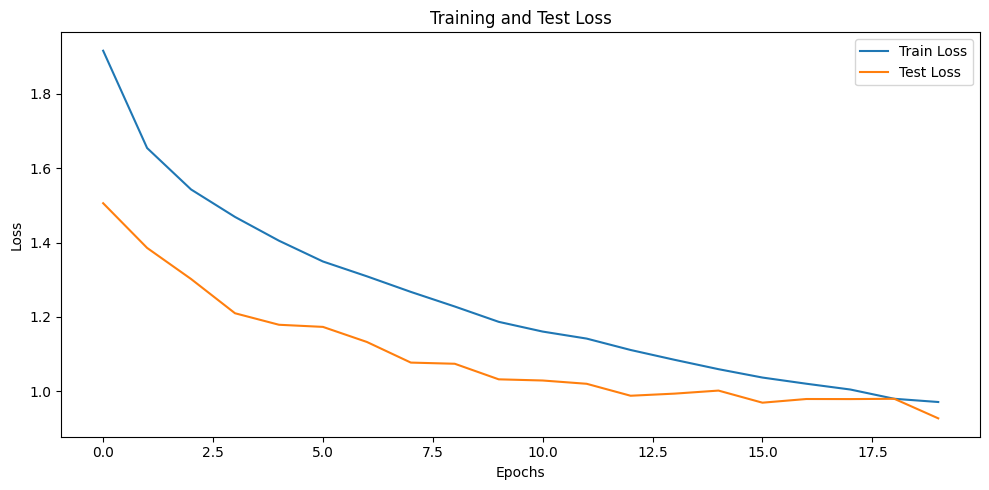

In [35]:
# Plot the training and test loss
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.title("Training and Test Loss")
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()

# V: Vision Language Models (VLM)

In this section, we will implement a Vision Language Model and finetune one for a Visual Question Answering task.

Here is a diagram for the VLM architecture:

<img src="https://raw.githubusercontent.com/AviSoori1x/seemore/refs/heads/main/images/vlm.png" width=512>

We have already implemented the vision encoder. We will now implement the text decoder (also based on the transformer architecture), and a multimodal projector. We will try to create a deep understanding of what is happening.

## V-1. The Multimodal Projector 

The ViT class (implemented in the last section) takes an input image and returns the embedding corresponding to the class token (CLS), which is then used to condition the text generation in the language decoder. 

However, we can not directly concatenate this to the text embeddings. We need to project this from the dimensionality of image embeddings from the vision transformer to the dimensionality of text embeddings. This is done by the multimodal projector.

This projector is usually a single learnable layer followed by a non-linearity or an MLP. Here we will implement a MLP wit one hidden layer, an expansion factor of $4$ and a GELU activation function. 

#### Question 12
Implement the Multimodal Projector

In [36]:
class MultiModalProjector(nn.Module):
    # To complete
    def __init__(self, input_dim, output_dim):
        super(MultiModalProjector, self).__init__()
        hidden_dim = input_dim * 4
        self.mlp = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.GELU(),
            nn.Linear(hidden_dim, output_dim)
        )
        
    def forward(self, x):
        return self.mlp(x)

## V-2. The Language Transformer Decoder

The final component we need to look at is the decoder language model. 
The (text) Transformer Decoder is similar to the (Vision) Transformer Encoder defined before. The main differences are: 
- A text token embedding replaces the patch embedding. 
- Causal Self Attention replaces Self Attention in the Transformer Block. 
- A language modeling head is added on top of the last Transformer Block. 


### Causal Attention

In Causal Attention, masking is applied in each attention head to obscure any information following the current token's position, thereby directing the model's attention to only the preceding parts of the sequence. A token can not attend to the "future" (following) tokens in the sentence. 

In practice, a lower triangular mask $M$ is added to the similarity matrix between $Q$ and $K$. 

The causal attention operation is then given by: 
$$
A_{causal}(Q,K,V) = \text{SoftMax}(\frac{QK^T + M}{\sqrt{d_k}})V
$$

<img src="https://blog.sailor.plus/deep-learning/images/1613723693323.png" width=512> 


#### Question 13
Implement the Causal Multi Head Self Attention 

Hint: You can start from the class implemented before.

In [ ]:
class CausalMultiHeadSelfAttention(nn.Module):
    def __init__(self, x_dim, hidden_dim, n_heads):
        super(CausalMultiHeadSelfAttention, self).__init__()
        self.n_heads = n_heads
        assert hidden_dim % n_heads == 0
        self.head_dim = hidden_dim // n_heads
        self.scale = 1.0 / math.sqrt(self.head_dim)

        self.to_q = nn.Linear(x_dim, hidden_dim, bias=False)
        self.to_k = nn.Linear(x_dim, hidden_dim, bias=False)
        self.to_v = nn.Linear(x_dim, hidden_dim, bias=False)
        self.to_out = nn.Linear(hidden_dim, x_dim)

    def forward(self, x):
        # x: (batch_size, x_len, x_dim)
        batch_size, x_len, _ = x.size()

        Q = self.to_q(x)
        K = self.to_k(x)
        V = self.to_v(x)

        Q = Q.view(batch_size, x_len, self.n_heads, self.head_dim).transpose(1, 2)
        K = K.view(batch_size, x_len, self.n_heads, self.head_dim).transpose(1, 2)
        V = V.view(batch_size, x_len, self.n_heads, self.head_dim).transpose(1, 2)

        similarity = torch.einsum('bhqd,bhkd->bhqk', Q, K)
        similarity = similarity * self.scale

        # --- causal mask ---
        mask = torch.tril(torch.ones(x_len, x_len, device=x.device))
        similarity = similarity.masked_fill(mask == 0, float('-inf'))

        attn = torch.softmax(similarity, dim=-1)
        out = torch.einsum('bhqk,bhkd->bhqd', attn, V)

        out = out.transpose(1, 2).contiguous()
        out = out.view(batch_size, x_len, -1)

        return self.to_out(out)

### Transformer Decoder Block

Now we implement a Transformer Decoder Block using the Causal Attention. 

#### Question 14

Implement the Transformer Decoder Block

In [37]:
class TransformerDecoderBlock(nn.Module):
    def __init__(self, data_dim, hidden_dim, n_heads, dropout_rate=0.1):
        # To complete
        super(TransformerDecoderBlock, self).__init__()
        self.causal_mhsa = CausalMultiHeadSelfAttention(data_dim, hidden_dim, n_heads)
        self.norm1 = LayerNorm(data_dim)
        self.cross_mha = MultiHeadCrossAttention(data_dim, data_dim, hidden_dim, n_heads)
        self.norm2 = LayerNorm(data_dim)
        self.ffn = FFN(hidden_dim, dropout_rate)
        self.norm3 = LayerNorm(data_dim)
    
    def forward(self, x):
        # To complete
        x_residual = x
        x = self.causal_mhsa(x)
        x = x + x_residual
        x = self.norm1(x)
        x_residual = x
        x = self.cross_mha(x, x)
        x = x + x_residual
        x = self.norm2(x)
        x_residual = x
        x = self.ffn(x)
        x = x + x_residual
        x = self.norm3(x)
        return x

## Building the Language Transformer Decoder

#### Question 15

Implement the Language Transformer Decoder

In [ ]:
class LanguageTransformerDecoder(nn.Module):
    def __init__(self, n_embd, image_embed_dim, vocab_size, n_heads, n_layers):
        # To complete
        super(LanguageTransformerDecoder, self).__init__()
        self.token_embedding = nn.Embedding(vocab_size, n_embd)
        self.pos_encoding = LearnedPositionalEncoding(n_embd, max_len=1000)
        self.layers = nn.ModuleList([
            TransformerDecoderBlock(n_embd, n_embd, n_heads) for _ in range(n_layers)
        ])
        self.ln_f = nn.LayerNorm(n_embd)
        self.head = nn.Linear(n_embd, vocab_size, bias=False)

    def forward(self, idx, image_embeds):
        # To complete
        x = self.token_embedding(idx)
        x = self.pos_encoding(x)
    
    def generate(self, idx, image_embeds, max_new_tokens):
        ### Do not complete this method ### 
        # With the logits outputted by the forward method 
        # and using sampling methods (e.g., greedy sampling, top-k sampling, nucleus sampling)
        # we can generate some text tokens!! 
        for _ in range(max_new_tokens):
            logits = self.forward(idx, image_embeds)
            logits = logits[:, -1, :]  # Focus on the last time step
            probs = F.softmax(logits, dim=-1)
            next_token = torch.argmax(probs, dim=-1, keepdim=True)
            idx = torch.cat((idx, next_token), dim=1)
        return idx

With the logits outputted by the forward method and using sampling methods (e.g., greedy sampling, top-k sampling, nucleus sampling), we can generate some text tokens!

## V-4. Bringing everything together to implement the Vision Language Model

Now, we have all the element to build our Vision Languauge model. 

#### Question 16

Implement the Vision Language Model class

In [ ]:
class VisionLanguageModel(nn.Module):
    def __init__(
            self,
            n_embd,
            image_embed_dim,
            vocab_size,
            n_enc_layers,
            img_size, patch_size,
            n_heads,
            n_dec_layers,
            dropout_rate
        ):
        # To complete
        pass

    def forward(self, img_array, idx):
        # To complete
        pass

    def generate(self, img_array, idx, max_new_tokens):
        # To complete
        pass

## VI. Finetuning a VLM for Visual Question Answering task

Training a Vision Language Model from scratch requires a lot of training data and GPU ressources. Then, we are going to finetune an already pretrained VLM on a specific task: Visual Question Answering.  

We will fine-tune the recent VLM `Florence-2` from Microsoft on the dataset DocVQA.

Lets start by donwloading the model and the dataset.

In [ ]:
from datasets import load_dataset
from transformers import AutoModelForCausalLM, AutoProcessor
import torch

data = load_dataset("HuggingFaceM4/DocumentVQA", split=["train[:10%]", "validation[:10%]", "test[:10%]"])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = AutoModelForCausalLM.from_pretrained("microsoft/Florence-2-base-ft", trust_remote_code=True, revision='refs/pr/6').to(device)
processor = AutoProcessor.from_pretrained("microsoft/Florence-2-base-ft", trust_remote_code=True, revision='refs/pr/6')

torch.cuda.empty_cache()

Let's do inference with our dataset first to see how the model performs before fine-tuning.

In [ ]:
# Function to run the model on an example
def run_example(task_prompt, text_input, image):
    prompt = task_prompt + text_input

    # Ensure the image is in RGB mode
    if image.mode != "RGB":
        image = image.convert("RGB")

    inputs = processor(text=prompt, images=image, return_tensors="pt").to(device)
    generated_ids = model.generate(
        input_ids=inputs["input_ids"],
        pixel_values=inputs["pixel_values"],
        max_new_tokens=1024,
        num_beams=3
    )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
    parsed_answer = processor.post_process_generation(generated_text, task=task_prompt, image_size=(image.width, image.height))
    return parsed_answer

In [ ]:
for idx in range(3):
    print(run_example("DocVQA", 'What is written on top of the document?', data[0][idx]['image']))
    display(data[0][idx]['image'].resize([350, 350]))

We need to construct our dataset. Note how we are adding a new task prefix `<DocVQA>` before the question when constructing the prompt.

In [ ]:
from torch.utils.data import Dataset

class DocVQADataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        example = self.data[idx]
        question = "<DocVQA>" + example['question']
        first_answer = example['answers'][0]
        image = example['image']
        if image.mode != "RGB":
            image = image.convert("RGB")
        return question, first_answer, image

Let's get to fine-tuning. We will instntiate our dataset, the data collator, and start training.

In [ ]:
import os
from torch.utils.data import DataLoader, Subset
from tqdm import tqdm
from transformers import AutoProcessor, get_scheduler
from bitsandbytes.optim import AdamW

def collate_fn(batch):
    questions, answers, images = zip(*batch)
    inputs = processor(text=list(questions), images=list(images), return_tensors="pt", padding=True).to(device)
    return inputs, answers

# Create datasets
train_dataset = DocVQADataset(data[0])
val_dataset = DocVQADataset(data[1])

Finetuning the model on the entire dataset will be too long for us (around 2,5 hours per epoch) and could be too heavy for the vRAM of the GPU we are using. We reduce the size of the dataset using `Subset`.

You can adapt the size of the subsets depending on your GPU. 

If you have time, run the finetuning on the entire dataset, the results will be even better!

In [ ]:
# Use a subset of the dataset for training
train_dataset = Subset(train_dataset, list(range(0, 1000)))
val_dataset = Subset(val_dataset, list(range(0, 200)))

# Create DataLoader
batch_size = 2
num_workers = 0

train_loader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=collate_fn, num_workers=num_workers, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=collate_fn, num_workers=num_workers)

#### Question 16 (Bonus)

Complete the training loop in the `train model` function

In [ ]:
def train_model(train_loader, val_loader, model, processor, epochs=10, lr=1e-6):
    optimizer = AdamW(model.parameters(), lr=lr)
    num_training_steps = epochs * len(train_loader)
    lr_scheduler = get_scheduler(
        name="linear",
        optimizer=optimizer,
        num_warmup_steps=0,
        num_training_steps=num_training_steps,
    )

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        i = -1
        for batch in tqdm(train_loader, desc=f"Training Epoch {epoch + 1}/{epochs}"):
            i += 1
            inputs, answers = batch

            input_ids = inputs["input_ids"]
            pixel_values = inputs["pixel_values"]
            labels = processor.tokenizer(text=answers, return_tensors="pt", padding=True, return_token_type_ids=False).input_ids.to(device)

            ### Complete here:  ###
            # Get the logits from the model
            # Calculate the loss
            # Backpropagate


            ### End completion ###

            train_loss += loss.item()

        avg_train_loss = train_loss / len(train_loader)
        print(f"Average Training Loss: {avg_train_loss}")

        # Validation phase
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for batch in tqdm(val_loader, desc=f"Validation Epoch {epoch + 1}/{epochs}"):
                inputs, answers = batch

                input_ids = inputs["input_ids"]
                pixel_values = inputs["pixel_values"]
                labels = processor.tokenizer(text=answers, return_tensors="pt", padding=True, return_token_type_ids=False).input_ids.to(device)

                outputs = model(input_ids=input_ids, pixel_values=pixel_values, labels=labels)
                loss = outputs.loss

                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_loader)
        print(f"Average Validation Loss: {avg_val_loss}")

        # Save model checkpoint
        output_dir = f"./model_checkpoints/epoch_{epoch+1}"
        os.makedirs(output_dir, exist_ok=True)
        model.save_pretrained(output_dir)
        processor.save_pretrained(output_dir)

We will freeze image encoder for this TP. The authors have reported improvement in unfreezing image encoder, but note that this will result in more resource usage.

In [ ]:
for param in model.vision_tower.parameters():
    param.is_trainable = False

Note: if the following cell crash with the error `OutOfMemoryError: CUDA out of memory.`, try to reduce the batch size and/or the number of example in the train/validation set.

In [ ]:
train_model(train_loader, val_loader, model, processor, epochs=2)

Let's do inference with our finetuned model:

In [ ]:
for idx in range(3):
    print(run_example("DocVQA", 'What is written on top of the document?', data['train'][idx]['image']))
    display(data['train'][idx]['image'].resize([350, 350]))